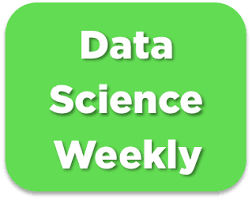

# Challenge : predict conversions 🏆🏆

## Template

### Import libraries

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model
from sklearn.linear_model import LogisticRegression

# Assessment
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7", "#4BE8E0", "#9DD4F3", 
        "#97FBF6", "#2A7FAF", "#23B1AB", 
        "#0E3449", "#015955"
    ])
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

### Read file with labels

In [193]:
data = pd.read_csv('src/conversion_data_train.csv')
print('Set with labels :', data.shape)
print()
data.head()

Set with labels : (284580, 6)



,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


### Explore dataset

In [194]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000)

### Make your model

#### Choose variables to use in the model, and create train and test sets

**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [195]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [196]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [197]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print('...Done.')
print()

Dividing into train and test sets...
...Done.



#### Training pipeline

In [198]:
# Put here all the preprocessings
print('Encoding categorical features and standardizing numerical features...')

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print('...Done!')
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done!
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [199]:
# Train model
print("Train model...")
classifier = LogisticRegression() # 
classifier.fit(X_train, Y_train)
print('...Done!')

Train model...
...Done!


In [201]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print('...Done!')
print(Y_train_pred)
print()

Predictions on training set...
...Done!
[0 0 0 ... 0 0 0]



#### Test pipeline

In [202]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print('...Done')
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [203]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



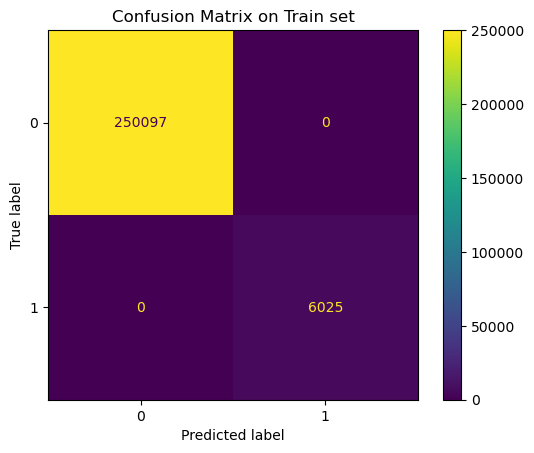

In [204]:
_, ax = plt.subplots()  
ax.set(title="Confusion Matrix on Train set")  
ConfusionMatrixDisplay.from_estimator(classifier, X_train, Y_train_pred, ax=ax)  
plt.show()

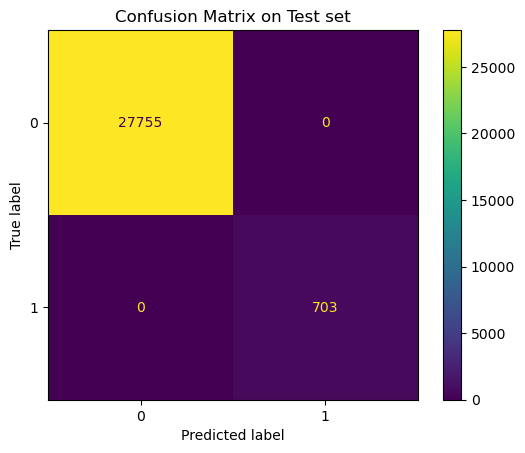

In [205]:
_, ax = plt.subplots()  
ax.set(title="Confusion Matrix on Test set")  
ConfusionMatrixDisplay.from_estimator(classifier, X_test, Y_test_pred, ax=ax)  
plt.show()

### Performance assessment

In [207]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855422


In [208]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

### Train best classifier on all data and use it to make predictions on X_without_labels

**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [209]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [210]:
# Read data without labels
data_without_labels = pd.read_csv('src/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to arrays before using scikit-learn
print("Convert pandas DataFrames to arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to arrays...
...Done
[[16]
 [ 5]
 [ 1]
 [ 6]
 [ 3]]


In [211]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[ 3.33326238]
 [ 0.03879562]
 [-1.15919229]
 [ 0.3382926 ]
 [-0.56019834]]


c:\Users\arani\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [212]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {'converted': classifier.predict(X_without_labels)}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('submission/template_predictions.csv', index=False)
display(Y_predictions.head())


,converted
0,1
1,0
2,0
3,0
4,0


### Evaluating the submission with the test labels

In [213]:
test_labels = pd.read_csv("src/conversion_data_test_labels.csv")["converted"]

# Charger les prédictions générées
Y_predictions = pd.read_csv('src/template_predictions.csv')["converted"]


# Calculer les métriques
f1 = f1_score(test_labels, Y_predictions)

# Afficher les résultats
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.69


### Analyzing the coefficients and interpreting the result

**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**

## Optimization of template model

**Just use all features to make the prediction**

**Use the same useful libraries**

### Reload data with labels

In [214]:
data = pd.read_csv('src/conversion_data_train.csv')
print('Set with labels :', data.shape)
print()
display(data.head())
print()
data.info()
print()
display(data.describe())
print()
print('Percentage of missing values :')
missing_values = data.isnull().sum() / data.shape[0] * 100
display(missing_values)
print()

Set with labels : (284580, 6)



,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB



,age,new_user,total_pages_visited,converted
count,284580.000000,284580.000000,284580.000000,284580.000000
mean,30.564203,0.685452,4.873252,0.032258
std,8.266789,0.464336,3.341995,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000



Percentage of missing values :


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

**May be we need manage outliers in 'age' column, let's check it**

In [215]:
def remove_outliers(df, columns):
    """
    Removes outliers from specified columns in a DataFrame using the IQR method.

    Parameters:
    df (pd. DataFrame): The DataFrame containing the data.
    columns (list): List of columns to clean up outliers.

    Returns:
    pd. DataFrame: DataFrame without outliers.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  
        Q3 = df[col].quantile(0.75)  
        IQR = Q3 - Q1
        
        # Définir les bornes pour détecter les outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filtrer les lignes qui sont dans les bornes
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Exemple d'utilisation
columns_to_clean = ['age']  # Remplacez par les colonnes de votre dataset
data = remove_outliers(data, columns_to_clean)

print(f"Cleaned data : {data.shape}")
print()
display(data.describe())


Cleaned data : (283211, 6)



,age,new_user,total_pages_visited,converted
count,283211.000000,283211.000000,283211.000000,283211.000000
mean,30.432766,0.685390,4.874122,0.032379
std,8.063141,0.464361,3.343719,0.177004
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,54.000000,1.000000,29.000000,1.000000


### Exploratory Data Analysis

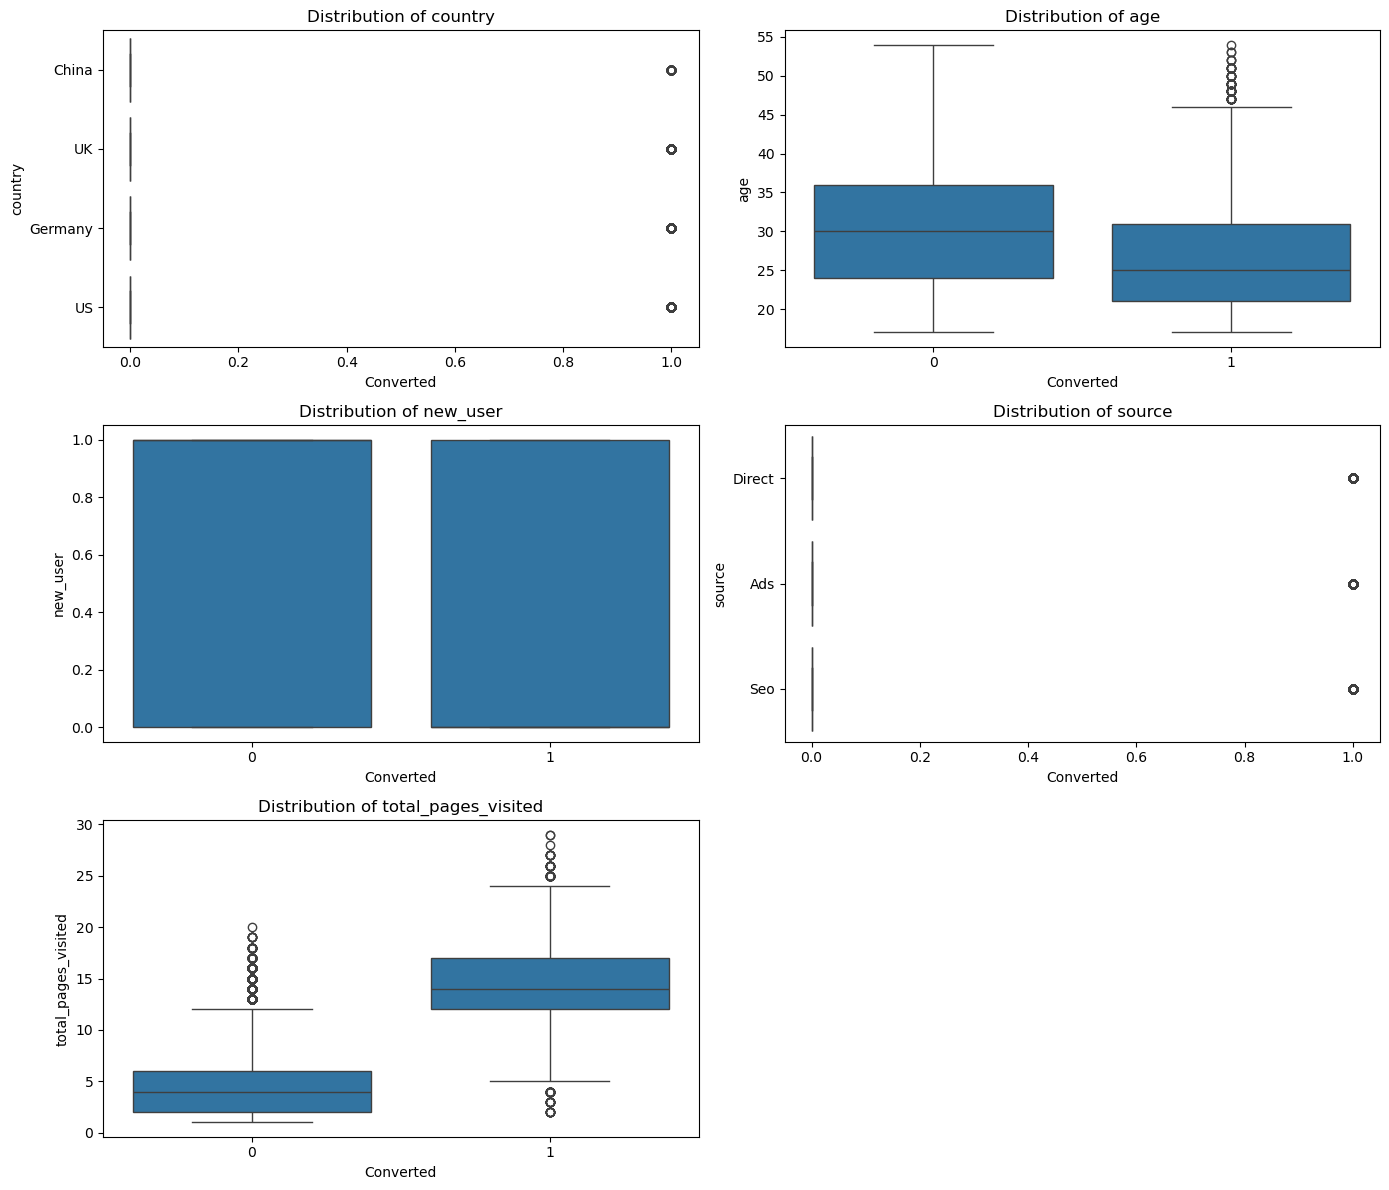

In [217]:
# View for distribution of features
features_list = data.drop(columns=['converted']).columns
n_features = len(features_list) 

# Create subplots
n_rows = (n_features + 1) // 2  # +1 to ensure at least one row
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array

# Plot distribution of features
for i, col in enumerate(features_list):
    sns.boxplot(x=data['converted'], y=data[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Converted')
    axes[i].set_ylabel(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

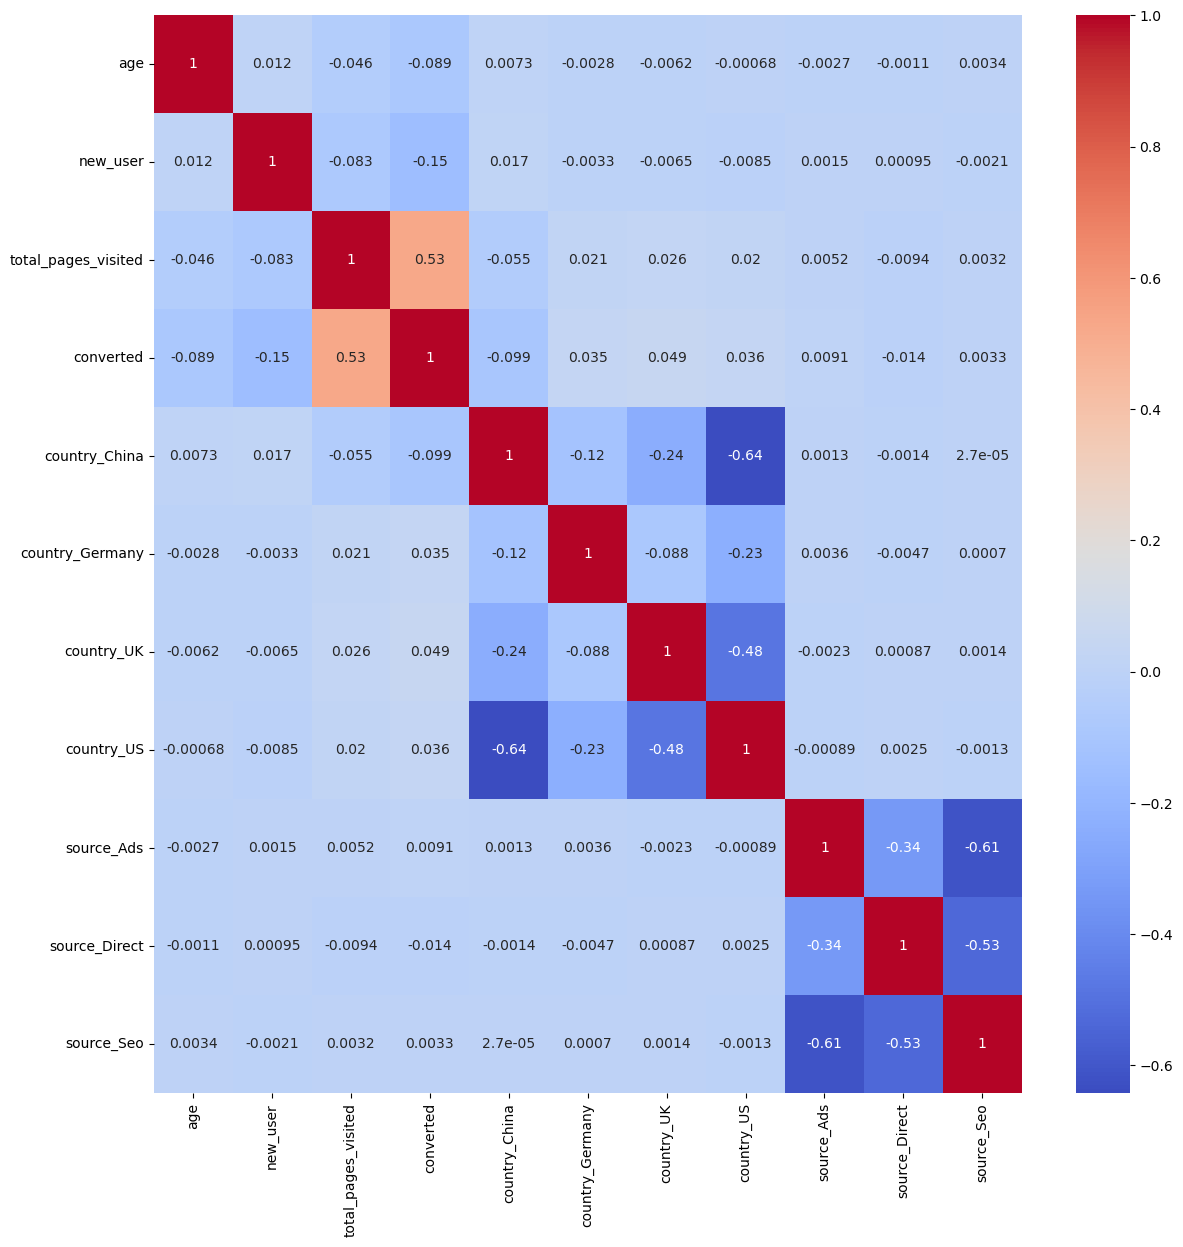

<Figure size 640x480 with 0 Axes>

In [218]:
# View heatmap of the dataset

# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')

plt.show()

# Save the heatmap to a file
plt.savefig('img/heatmap.png', dpi=300, bbox_inches='tight')

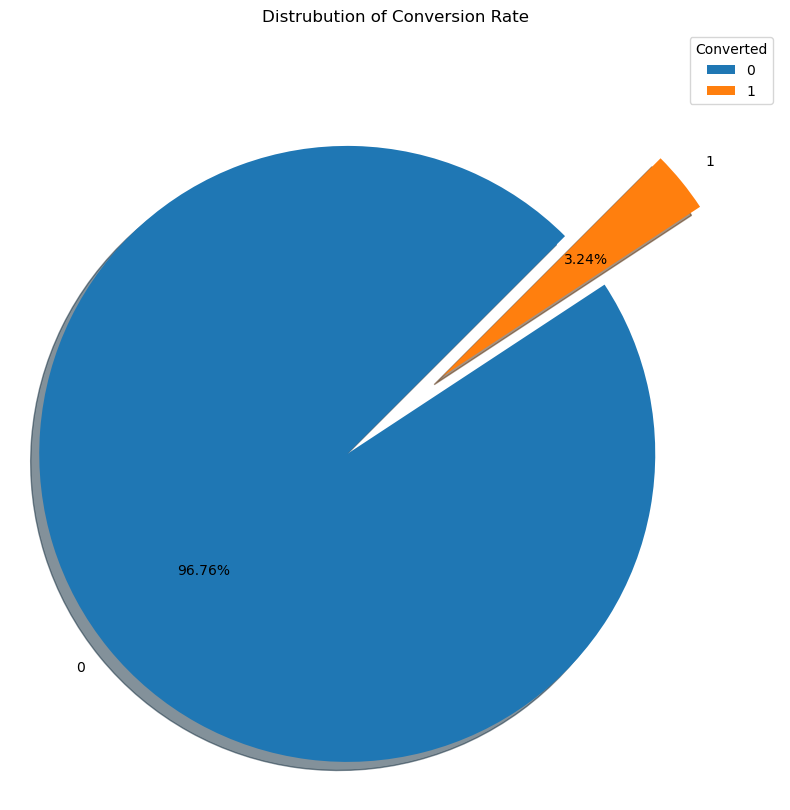

In [219]:
# View distribution of conversion rate
converted = data['converted'].value_counts() * 100

# Create pie chart
explode = [0.2] * len(converted)  # Adjust length to number of categories
converted.plot.pie(
    explode=explode,
    autopct = '%1.2f%%',
    shadow = True,
    startangle=45,
    figsize=(10, 10)
)
plt.legend(labels=converted.index, loc='upper right', title='Converted')
plt.title('Distrubution of Conversion Rate')
plt.ylabel('')
plt.show()

In [220]:
print(data.columns)

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')


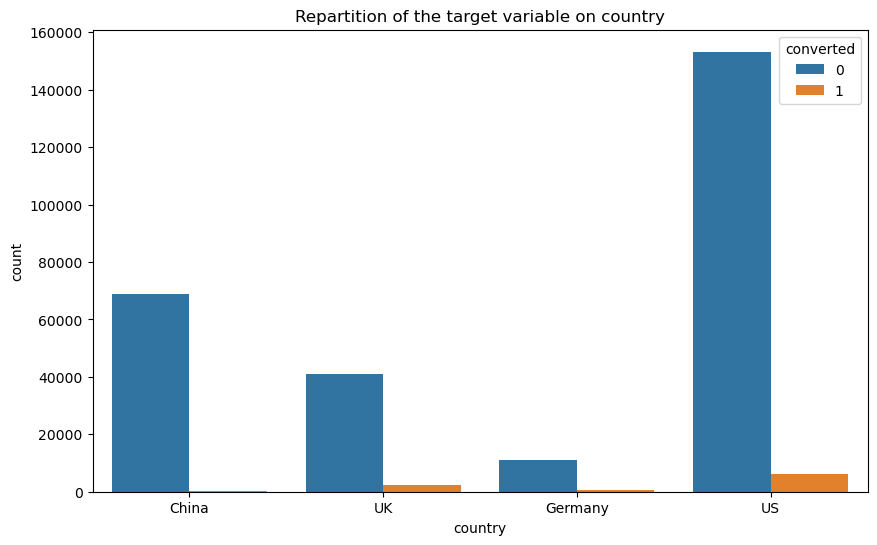

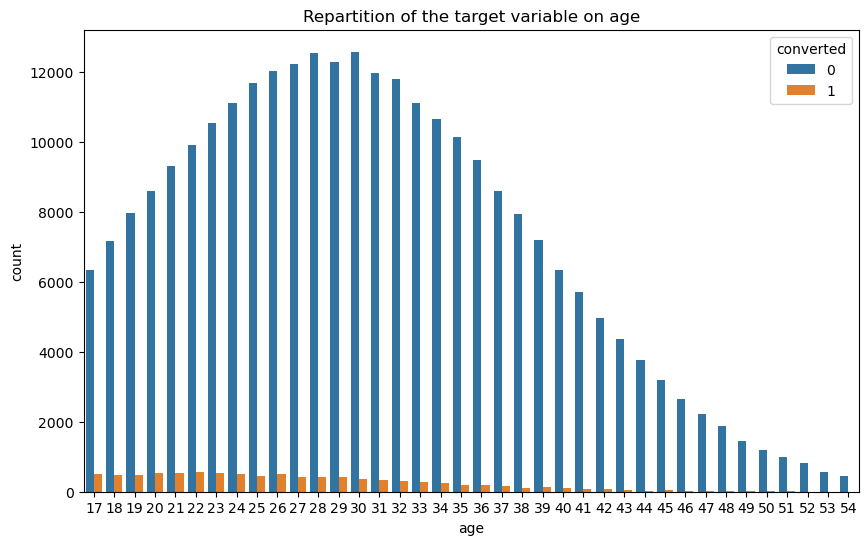

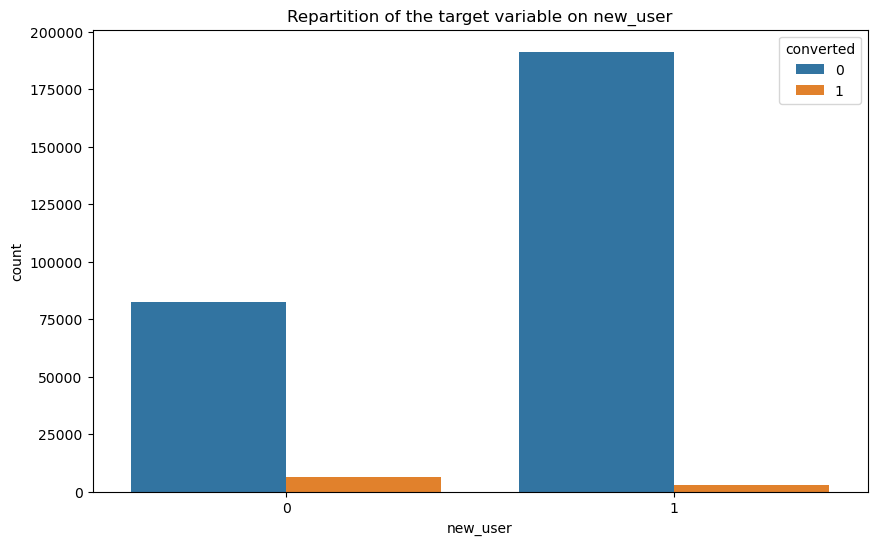

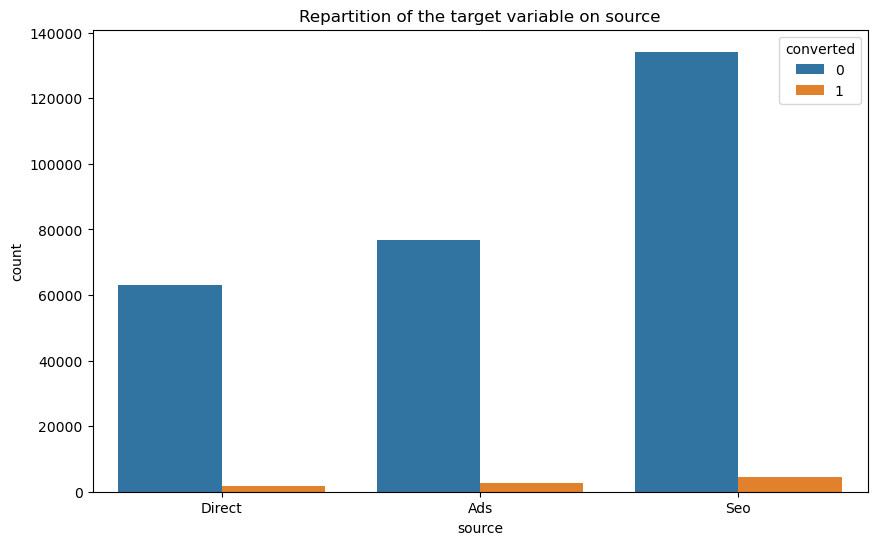

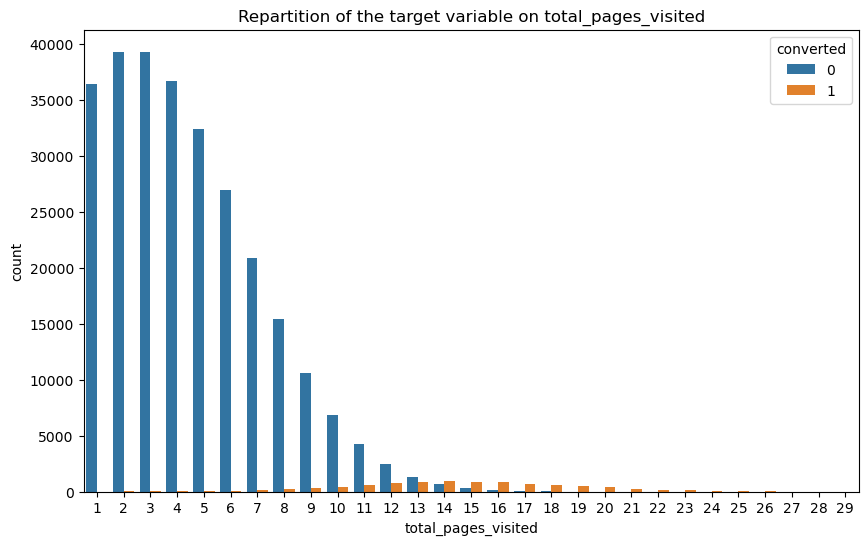

In [221]:
# View repartition of the target variable on features

# First we create a function to plot the repartition of the target variable on a feature
def plot_target_repartition(feature):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='converted', data=data)
    plt.title(f'Repartition of the target variable on {feature}')
    plt.show()

# Then we apply the function to each feature
for feature in data.columns:
    if feature != 'converted' :
        plot_target_repartition(feature)
    


### Preprocessing 

In [223]:
# Separate features and target variable
print("Separating features and target variable...")
print(f"Columns of data: {data.columns}")
print()
X = data.drop('converted', axis=1)
y = data['converted']
print('...Done!')
print()

# Train/Test Split
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('...Done!')
print()

# Define categorical and numerical features
print("Defining categorical and numerical features...")
numeric_features = []
categorical_features = []
for i in X.columns:
    if X[i].dtype == 'object':
        categorical_features.append(i)
    else:
        numeric_features.append(i)
print("Found numerical features:", numeric_features)
print("Found categorical features:", categorical_features)
print('...Done!')
print()

# Create pipeline for numerical features
print("Creating pipeline for numerical features...")
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
print('...Done!')
print()

# Create pipeline for categorical features
print("Creating pipeline for categorical features...")
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])
print('...Done!')
print()

# Combine pipelines
print("Combining pipelines...")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print('...Done!')
print()

Separating features and target variable...
Columns of data: Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

...Done!

Dividing into train and test sets...
...Done!

Defining categorical and numerical features...
Found numerical features: ['age', 'new_user', 'total_pages_visited']
Found categorical features: ['country', 'source']
...Done!

Creating pipeline for numerical features...
...Done!

Creating pipeline for categorical features...
...Done!

Combining pipelines...
...Done!



### Use the same model and train it again

In [224]:
# Train model
print("Train model...")
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

model_pipeline.fit(X_train, y_train)
print('...Done!')

Train model...
...Done!


In [225]:
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'new_user',
                                                   'total_pages_visited']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['country', 'source'])])),
                ('classifier', LogisticRegression())])

### Make predictions

In [226]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model_pipeline.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model_pipeline.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Predictions on test set...
...Done.
[0 0 1 ... 0 0 0]



### Assessment of the model

In [227]:
print("f1-score on train set : ", f1_score(y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(y_test, Y_test_pred))

f1-score on train set :  0.7621568479165091
f1-score on test set :  0.7693229478729778


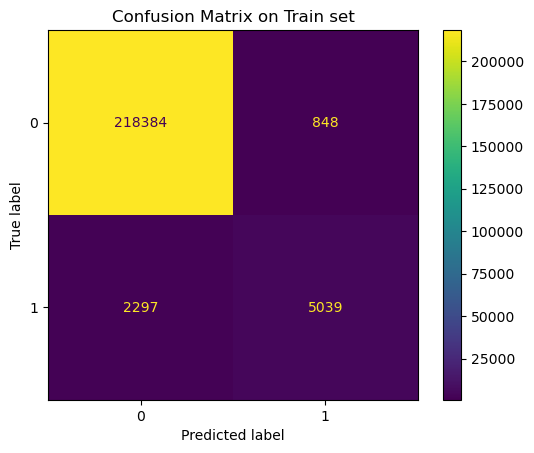

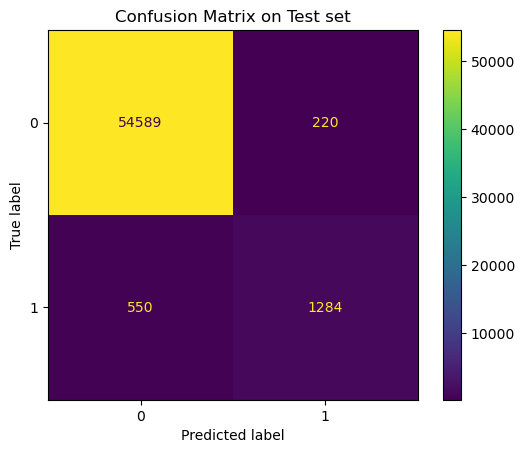

In [229]:
# Visualize confusion matrices
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set")  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_train, y_train, ax=ax)  # ConfusionMatrixDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set")  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_pipeline, X_test, y_test, ax=ax)  # ConfusionMatrixDisplay from sklearn
plt.show()

### Train our model on ALL the data

In [230]:
# Concatenate train and test data
X = pd.concat([X_train, X_test], axis=0)  
Y = pd.concat([y_train, y_test], axis=0)  

# Redefine numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Retraining the model with the entire dataset
model_pipeline.fit(X, Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'new_user',
                                                   'total_pages_visited']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['country', 'source'])])),
                ('classifier', LogisticRegression())])

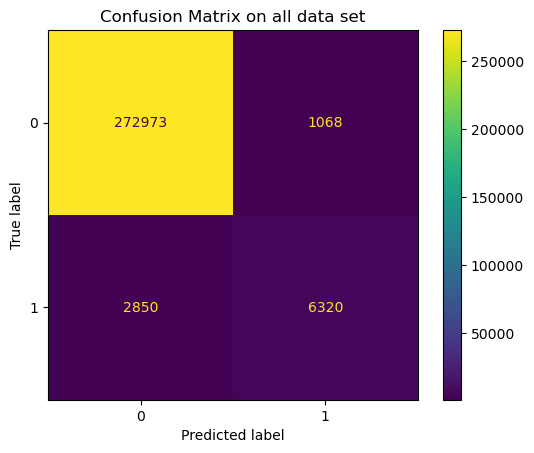

In [231]:
_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(title="Confusion Matrix on all data set")  # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_pipeline, X, Y, ax=ax)  # ConfusionMatrixDisplay from sklearn
plt.show()

### Make predictions with data test without labels

In [235]:
# Load data without labels
data_without_labels = pd.read_csv('src/conversion_data_test.csv')

# Define the features list
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels[features_list]

# Apply the pipeline on the data
predictions_without_labels = model_pipeline.predict(X_without_labels)

# Create a DataFrame with the predictions
Y_predictions = pd.DataFrame({'converted': predictions_without_labels })

# Save the predictions to a CSV file
Y_predictions.to_csv('submission/optimised_template_predictions.csv', index=False)

print("Prediction without labels saved to optimised_template_predictions.csv")
display(Y_predictions.head())


Prediction without labels saved to optimised_template_predictions.csv


,converted
0,1
1,0
2,0
3,0
4,0


### Evaluation of all submissions with the test labels

**Evaluates multiple models by calculating their performance metrics and returns a ranking.**

Parameters:
test_labels_path (str): The path to the CSV file containing the actual labels.
predictions_paths (dict): A dictionary where the keys are the names of the models and the values
are the paths to the CSV files that contain the predictions of the models.

Returns:
pd. DataFrame: A DataFrame containing the metrics (F1-score, precision, recall, accuracy) for each model,
sorted by F1-score in a descending manner.

In [236]:
test_labels = pd.read_csv("src/conversion_data_test_labels.csv")["converted"]

# Charger les prédictions générées
Y_predictions = pd.read_csv('submission/optimised_template_predictions.csv')["converted"]


# Calculer les métriques
f1 = f1_score(test_labels, Y_predictions)

# Afficher les résultats
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.76


In [237]:
def evaluate_models(test_labels_path, predictions_paths):
    # Load test labels
    test_labels = pd.read_csv(test_labels_path)
    
    # Initialize a list to store metrics
    metrics = []

    for model_name, pred_path in predictions_paths.items():
        # Load predictions
        Y_predictions = pd.read_csv(pred_path)
        
        # Calculate F1 score
        f1 = f1_score(test_labels, Y_predictions)
        
        # Add metrics to the list
        metrics.append({
            "Model": model_name,
            "F1 Score": f1,
        })
    
    # Create a DataFrame from the metrics list
    metrics_df = pd.DataFrame(metrics)
    metrics_df = metrics_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
    
    return metrics_df

# Call the function with the provided paths
test_labels_path = "src/conversion_data_test_labels.csv"
predictions_paths = {
    "Template": "src/template_predictions.csv",
    "Optimized template": "src/optimised_template_predictions.csv",
}

# Get the rankings
model_rankings = evaluate_models(test_labels_path, predictions_paths)
model_rankings


,Model,F1 Score
0,Optimized template,0.755024
1,Template,0.694224


## Analyzing the coefficients and intepreting the results

### Calculating the coefficients of the logistic regression model

In [238]:
# Get the coefficients from the logistic regression model
classifier = model_pipeline.named_steps['classifier']

# Verify the shape of the coefficients
print("Shape of coefficients:", classifier.coef_.shape)

# Create a DataFrame to store the coefficients
coefs_log_reg = pd.DataFrame(
    data=classifier.coef_.flatten(),  # Aplatir les coefficients si nécessaire
    index=['num__age', 'num__new_user', 'num__total_pages_visited', 
           'cat__country_Germany', 'cat__country_UK', 'cat__country_US', 
           'cat__source_Direct', 'cat__source_Seo'],  # Les noms des colonnes transformées
    columns=['Coefficient']
)

# Show the DataFrame
display(coefs_log_reg)

Shape of coefficients: (1, 8)


,Coefficient
num__age,-0.607914
num__new_user,-0.799310
num__total_pages_visited,2.528829
cat__country_Germany,3.620955
cat__country_UK,3.439967
cat__country_US,3.100459
cat__source_Direct,-0.198606
cat__source_Seo,-0.036813


### Interpretation of coefficients

**num_age is negative**
Which suggests that, as the user's age increases, the probability of subscribing to the newsletter decreases. 
This may indicate that older users are less inclined to subscribe.

**num__new__user is also negative** 
This means that new users are less likely to subscribe to the newsletter than existing users. 
Users who are already familiar with the site may be more inclined to subscribe.

**num__total_pages_visited is very high and positive**
This means that the more a user visit pages on your site, the more likely it is to subscribe to the newsletter. 
Users who are more committed and spend more time exploring the site are much more likely to subscribe.

**cat-country-Germany, cat-country-UK, cat-country-US are positive**

Which means that users from Germany, the United Kingdom and the United States are more likely to subscribe to the newsletter compared to users from other countries 
In particular, users in Germany have the highest probability of subscribing, followed by users in the United Kingdom and then in the United States.

**cat-source-Direct, cat-source-Seo are negative**
Suggesting that users arriving directly at the site or by SEO (natural referencing) have a slightly lower probability of subscribing to the newsletter compared to other traffic sources.
This could mean that users from paid marketing campaigns or other channels are more likely to subscribe to the newsletter than those who arrive directly or via organic searches.

### Analysis of the Model

**Age and new users**
Younger and existing users are more likely to subscribe to the newsletter. 
This could indicate that an acquisition strategy targeting younger age groups could be beneficial. 
In addition, it may be useful to focus more on users who return regularly.

**Commitment to the site (pages visited)**
Engagement with the content of the site (measured by the number of pages visited) is the most important factor. 
Users who spend more time on the site, visiting multiple pages, are much more likely to subscribe to the newsletter. 
This underlines the importance of promoting on-site engagement to increase conversions.

**Geographical origin**
Users in Germany, the United Kingdom and the United States are more likely to subscribe. 
This could suggest that these markets are more receptive to newsletter campaigns or that there is a more committed customer base in these countries.

**Traffic sources**
Users who arrive directly on the site or via SEO have a lower probability of subscribing to the newsletter, which could mean that a different marketing approach is needed for these users. 
Perhaps users from paid campaigns or specific sources are more likely to engage more.

### Recommendations : Marketing and Conversion Strategies

**Targeting engaged users**
Since users who visit more pages are much more likely to subscribe, it would be useful to encourage site browsing. For example, adding content suggestions or calls to action (CTA) that encourage discovery could help increase conversions.

**Optimize for younger and existing users**
You could test specific strategies for young and already subscribed users, because they have a greater propensity to subscribe to the newsletter. For example, you could offer content or benefits specific to these user groups.

**Exploiting high-conversion countries**
As users in Germany, the UK and the United States are more likely to subscribe, it might be wise to focus marketing efforts (e.g. targeted advertising campaigns) on these regions.

**Analyzing and adjusting traffic sources**
Users from SEO or direct traffic seem less inclined to subscribe to the newsletter. You could test different approaches for these groups, such as more visible subscription incentives, pop-ups or special offers for these users, to improve conversion.

**User experience optimization**
Since engagement on the site is an important factor, improves the user experience by providing seamless navigation, personalised recommendations and strategic calls to action to encourage users to interact more with the site.